[Data Link: ](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
'''
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.utils import pad_sequences '''
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [6]:
import pandas as pd

# Read the CSV file with error handling for problematic lines
df = pd.read_csv(
    '/content/IMDB Dataset.csv',
    on_bad_lines='skip',  # Skip lines with parsing errors

)

# Display the first few rows
df.head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [7]:
df.shape

(50000, 2)

In [8]:
df = df.iloc[:10000]
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [9]:
df.shape

(10000, 2)

In [10]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


In [12]:
df.isnull().sum()

,0
review,0
sentiment,0


In [13]:
df.duplicated().sum()

17

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

# Basic Preprocessing
  - Remove tags - HTML
  - Lower case
  - remove stopwords

In [16]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [17]:
df['review'] = df['review'].apply(remove_tags)

In [18]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, whi...",positive
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of al...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [19]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [20]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [21]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [22]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['review'][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [24]:
df.head()

,review,sentiment
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha...",positive
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit...",positive
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r...",positive
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable...",negative
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ...",positive


In [25]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [26]:
X.head()

,review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha..."
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit..."
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r..."
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable..."
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ..."


In [27]:
y

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
5,positive
6,positive
7,negative
8,negative
9,positive


**Note:if we observe sentiment is categorial data so we covert into numerical by using LabelEncoder(ex:postive=1,negative=0)**

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [29]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
X_train.shape

(7986, 1)

In [32]:
X_test.shape

(1997, 1)

In [33]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Note:2**

if we use train data we can use cv.fit_transform()

if we use test data we can use cv.transform()

In [34]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

**Note 2:The code snippet you provided uses a Count Vectorizer (Bag-of-Words) representation to transform textual data into numerical feature vectors for machine learning models(review)**

In [35]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
X_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **for Model training we can use different algorithm.**

# **Naive Bayes in Machine Learning**

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem. It assumes feature independence given the class, making it simple and efficient.

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

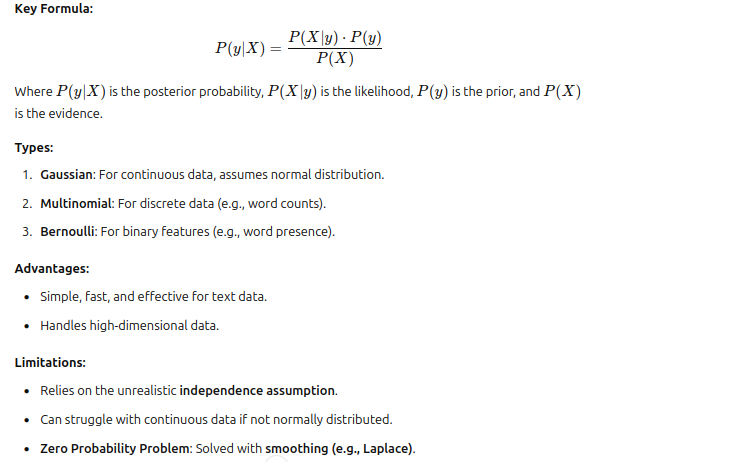

# **Applications:**

Spam detection, sentiment analysis, document classification, medical diagnosis.

In [38]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6324486730095142

In [39]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]])

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)

y_pred = rf.predict(X_test_bow)

accuracy_score(y_test,y_pred)

0.8507761642463696

In [42]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8327491236855283

# N grams

In [43]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8402603905858789

TFIDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [45]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [46]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8447671507260891